# Compagnie de taxi

La compagnie **Tax-E** désire optimiser ses temps de trajets à New York.

Voici les routes existantes entre les 16 emplacements de la ville:

| Départ|Arrivée|Durée|
|---|---|---|
| 1 | 2 |5min|
| 1 | 3 |9min|
|  1|4  |4min|
| 2 |5  |3min|
| 2 |6  |2min|
| 3 |4  |4min|
|  3|6  |1min|
|  4|7  |7min|
|  5|8  |4min|
|  5|9  |2min   |
|  5 | 10  | 9min  |
|   6| 7  |3min   |
|  6 |10   |9min   |
|   6| 11  |6min   |
|  7 |11   |8min   |
| 7  |  15 |5min   |
|  8 |12   |5min   |
|  9 |8   |3min   |
|  9 |13   |10min   |
|  10 | 9  |6min   |
|  10 |13   |5min   |
|  10 | 14  |1min   |
|  11 |14   |2min   |
|   12|16   |9min   |
|   13|12   |4min   |
|  13 |14   |3min   |
|  14 |16   |4min   |
| 15  |14   |4min   |
|   15|16   |3min   |


In [2]:
from source import libtaxi as lt
from source import libformat as lf

**1. Quel est le plus court chemin de 1 (compagnie de taxi) vers 16 (aéroport) ?**

In [3]:
chemin = lt.determine_trajet(
    depart = lt.Emplacement(nom=1),
    arrivee = lt.Emplacement(nom=16),
    ville = lt.CARTE_VILLE
)

In [4]:
lf.format_trajet(chemin)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 1 - 16 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 1 (durée : 5.0 minutes)                                                                             
 • Emplacement 2 (durée : 2.0 minutes)                                                                             
 • Emplacement 6 (durée : 3.0 minutes)                                                                             
 • Emplacement 7 (durée : 5.0 minutes)                                                                             
 • Emplacement 15 (durée : 3.0 minutes)                                                                            
 • Emplacement 16                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 18.0 minutes

In [5]:
it = lt.Itineraire(
    [
    lt.Emplacement(1),
    lt.Emplacement(2),
    lt.Emplacement(6),
    lt.Emplacement(7),
    lt.Emplacement(15),
    lt.Emplacement(16),
    ]
)

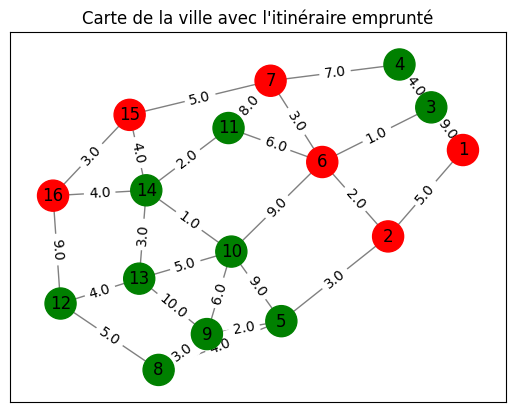

In [6]:
lt.carte_graphe(lt.CARTE_VILLE,it)

**2. Donner les chemins les plus courts entre tous les points de la ville.**

In [7]:
liste_trajet = list()

for i in lt.CARTE_VILLE.emplacements:
    for j in lt.CARTE_VILLE.emplacements:
        try:
            liste_trajet.append(lt.determine_trajet(depart=i,arrivee=j,ville=lt.CARTE_VILLE))
        except lt.MemeEmplacement:
            ""

In [8]:
len(liste_trajet)

240

In [9]:
lf.format_trajet(liste_trajet[98])

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 7 - 10 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 7 (durée : 5.0 minutes)                                                                             
 • Emplacement 15 (durée : 4.0 minutes)                                                                            
 • Emplacement 14 (durée : 1.0 minutes)                                                                            
 • Emplacement 10                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 10.0 minutes

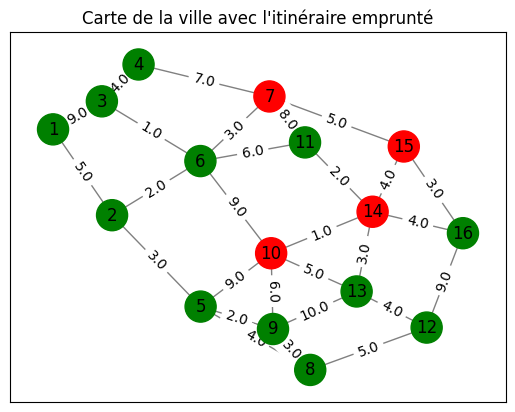

In [10]:
lt.carte_graphe(lt.CARTE_VILLE, liste_trajet[98])

**3. Etudier l'impact d'un ralentissement ou d'une fluidification sur la route 9-13 (On étudiera l'impact dans les deux sens pour diverses valeurs du ralentissement)**

In [11]:
bouchon = lt.genere_bouchons(lt.Emplacement(9), lt.Emplacement(13), 5, ville=lt.CARTE_VILLE)

In [12]:
lf.format_routes(bouchon)

                     Carte de la ville                      
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Emplacement de départ ┃ Emplacement d'arrivée ┃ Durée    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 1                     │ 2                     │ 5.0 min  │
│ 1                     │ 3                     │ 9.0 min  │
│ 1                     │ 4                     │ 4.0 min  │
│ 2                     │ 5                     │ 3.0 min  │
│ 2                     │ 6                     │ 2.0 min  │
│ 3                     │ 4                     │ 4.0 min  │
│ 3                     │ 6                     │ 1.0 min  │
│ 4                     │ 7                     │ 7.0 min  │
│ 5                     │ 8                     │ 4.0 min  │
│ 5                     │ 9                     │ 2.0 min  │
│ 5                     │ 10                    │ 9.0 min  │
│ 6                     │ 7                     │ 3.0 min  │
│ 6                     │ 10                    │ 9.0 min  │
│ 6                     │ 11                    │ 6.0 min  │
│ 7                     │ 11                    │ 8.0 min  │
│ 7                     │ 15                    │ 5.0 min  │
│ 8                     │ 12                    │ 5.0 min  │
│ 9                     │ 8                     │ 3.0 min  │
│ 9                     │ 13                    │ 15.0 min │
│ 10                    │ 9                     │ 6.0 min  │
│ 10                    │ 13                    │ 5.0 min  │
│ 10                    │ 14                    │ 1.0 min  │
│ 11                    │ 14                    │ 2.0 min  │
│ 12                    │ 16                    │ 9.0 min  │
│ 13                    │ 12                    │ 4.0 min  │
│ 13                    │ 14                    │ 3.0 min  │
│ 14                    │ 16                    │ 4.0 min  │
│ 15                    │ 14                    │ 4.0 min  │
│ 15                    │ 16                    │ 3.0 min  │
└───────────────────────┴───────────────────────┴──────────┘

In [13]:
bouchon2 = lt.genere_bouchons(lt.Emplacement(13), lt.Emplacement(9), 30, ville=lt.CARTE_VILLE)

In [14]:
lf.format_routes(bouchon2)

                     Carte de la ville                      
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Emplacement de départ ┃ Emplacement d'arrivée ┃ Durée    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 1                     │ 2                     │ 5.0 min  │
│ 1                     │ 3                     │ 9.0 min  │
│ 1                     │ 4                     │ 4.0 min  │
│ 2                     │ 5                     │ 3.0 min  │
│ 2                     │ 6                     │ 2.0 min  │
│ 3                     │ 4                     │ 4.0 min  │
│ 3                     │ 6                     │ 1.0 min  │
│ 4                     │ 7                     │ 7.0 min  │
│ 5                     │ 8                     │ 4.0 min  │
│ 5                     │ 9                     │ 2.0 min  │
│ 5                     │ 10                    │ 9.0 min  │
│ 6                     │ 7                     │ 3.0 min  │
│ 6                     │ 10                    │ 9.0 min  │
│ 6                     │ 11                    │ 6.0 min  │
│ 7                     │ 11                    │ 8.0 min  │
│ 7                     │ 15                    │ 5.0 min  │
│ 8                     │ 12                    │ 5.0 min  │
│ 9                     │ 8                     │ 3.0 min  │
│ 9                     │ 13                    │ 40.0 min │
│ 10                    │ 9                     │ 6.0 min  │
│ 10                    │ 13                    │ 5.0 min  │
│ 10                    │ 14                    │ 1.0 min  │
│ 11                    │ 14                    │ 2.0 min  │
│ 12                    │ 16                    │ 9.0 min  │
│ 13                    │ 12                    │ 4.0 min  │
│ 13                    │ 14                    │ 3.0 min  │
│ 14                    │ 16                    │ 4.0 min  │
│ 15                    │ 14                    │ 4.0 min  │
│ 15                    │ 16                    │ 3.0 min  │
└───────────────────────┴───────────────────────┴──────────┘

In [15]:
fluidification = lt.genere_bouchons(lt.Emplacement(9), lt.Emplacement(13), -5, ville=lt.CARTE_VILLE)

In [16]:
lf.format_routes(fluidification)

                     Carte de la ville                     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Emplacement de départ ┃ Emplacement d'arrivée ┃ Durée   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ 1                     │ 2                     │ 5.0 min │
│ 1                     │ 3                     │ 9.0 min │
│ 1                     │ 4                     │ 4.0 min │
│ 2                     │ 5                     │ 3.0 min │
│ 2                     │ 6                     │ 2.0 min │
│ 3                     │ 4                     │ 4.0 min │
│ 3                     │ 6                     │ 1.0 min │
│ 4                     │ 7                     │ 7.0 min │
│ 5                     │ 8                     │ 4.0 min │
│ 5                     │ 9                     │ 2.0 min │
│ 5                     │ 10                    │ 9.0 min │
│ 6                     │ 7                     │ 3.0 min │
│ 6                     │ 10                    │ 9.0 min │
│ 6                     │ 11                    │ 6.0 min │
│ 7                     │ 11                    │ 8.0 min │
│ 7                     │ 15                    │ 5.0 min │
│ 8                     │ 12                    │ 5.0 min │
│ 9                     │ 8                     │ 3.0 min │
│ 9                     │ 13                    │ 5.0 min │
│ 10                    │ 9                     │ 6.0 min │
│ 10                    │ 13                    │ 5.0 min │
│ 10                    │ 14                    │ 1.0 min │
│ 11                    │ 14                    │ 2.0 min │
│ 12                    │ 16                    │ 9.0 min │
│ 13                    │ 12                    │ 4.0 min │
│ 13                    │ 14                    │ 3.0 min │
│ 14                    │ 16                    │ 4.0 min │
│ 15                    │ 14                    │ 4.0 min │
│ 15                    │ 16                    │ 3.0 min │
└───────────────────────┴───────────────────────┴─────────┘

In [17]:
it3 = lt.determine_trajet(
    lt.Emplacement(9),
    lt.Emplacement(13),
    bouchon2
)

In [18]:
lf.format_trajet(it3)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 9 - 13 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 9 (durée : 6.0 minutes)                                                                             
 • Emplacement 10 (durée : 1.0 minutes)                                                                            
 • Emplacement 14 (durée : 3.0 minutes)                                                                            
 • Emplacement 13                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 10.0 minutes

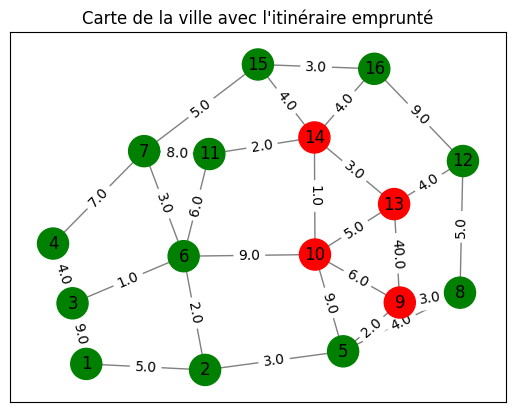

In [19]:
lt.carte_graphe(bouchon2,it3)

In [20]:
it4 = lt.determine_trajet(
    lt.Emplacement(5),
    lt.Emplacement(13),
    fluidification
)

In [21]:
lf.format_trajet(it4)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 5 - 13 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 5 (durée : 2.0 minutes)                                                                             
 • Emplacement 9 (durée : 10.0 minutes)                                                                            
 • Emplacement 13                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 12.0 minutes

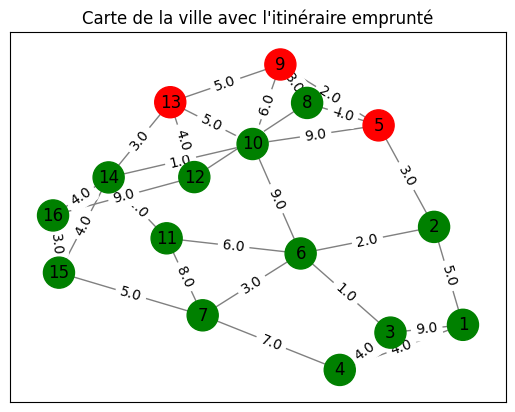

In [22]:
lt.carte_graphe(fluidification,it4)

**4. Modifier le modèle pour prendre en compte le fait que les emplacements (3,5,7,9,11) sont en travaux et que tout passage par un de ces lieux ajoute 1min au trajet**

In [30]:
travaux = lt.genere_travaux(
    [
        lt.Emplacement(3),
        lt.Emplacement(5),
        lt.Emplacement(7),
        lt.Emplacement(9), 
        lt.Emplacement(11)
    ], 
    1,
    ville = lt.CARTE_VILLE)

In [33]:
lf.format_routes(travaux)

                     Carte de la ville                      
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Emplacement de départ ┃ Emplacement d'arrivée ┃ Durée    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 1                     │ 2                     │ 5.0 min  │
│ 1                     │ 3                     │ 10.0 min │
│ 1                     │ 4                     │ 4.0 min  │
│ 2                     │ 5                     │ 4.0 min  │
│ 2                     │ 6                     │ 2.0 min  │
│ 3                     │ 4                     │ 5.0 min  │
│ 3                     │ 6                     │ 2.0 min  │
│ 4                     │ 7                     │ 8.0 min  │
│ 5                     │ 8                     │ 5.0 min  │
│ 5                     │ 9                     │ 4.0 min  │
│ 5                     │ 10                    │ 10.0 min │
│ 6                     │ 7                     │ 4.0 min  │
│ 6                     │ 10                    │ 9.0 min  │
│ 6                     │ 11                    │ 7.0 min  │
│ 7                     │ 11                    │ 10.0 min │
│ 7                     │ 15                    │ 6.0 min  │
│ 8                     │ 12                    │ 5.0 min  │
│ 9                     │ 8                     │ 4.0 min  │
│ 9                     │ 13                    │ 11.0 min │
│ 10                    │ 9                     │ 7.0 min  │
│ 10                    │ 13                    │ 5.0 min  │
│ 10                    │ 14                    │ 1.0 min  │
│ 11                    │ 14                    │ 3.0 min  │
│ 12                    │ 16                    │ 9.0 min  │
│ 13                    │ 12                    │ 4.0 min  │
│ 13                    │ 14                    │ 3.0 min  │
│ 14                    │ 16                    │ 4.0 min  │
│ 15                    │ 14                    │ 4.0 min  │
│ 15                    │ 16                    │ 3.0 min  │
└───────────────────────┴───────────────────────┴──────────┘

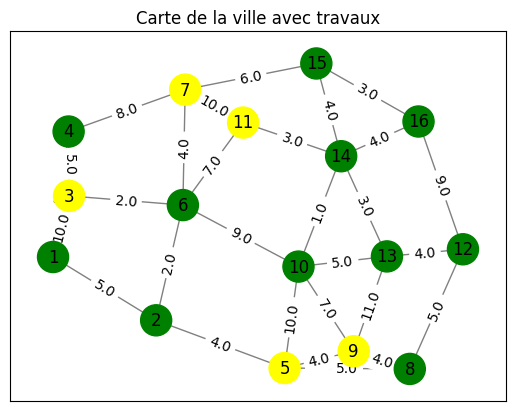

In [32]:
lt.carte_graphe(
    travaux, 
    travaux = [
        lt.Emplacement(3),
        lt.Emplacement(5), 
        lt.Emplacement(7), 
        lt.Emplacement(9), 
        lt.Emplacement(11)
    ]
)

In [34]:
it5 = lt.determine_trajet(
    lt.Emplacement(1),
    lt.Emplacement(13),
    lt.CARTE_VILLE
)
lf.format_trajet(it5)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 1 - 13 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 1 (durée : 5.0 minutes)                                                                             
 • Emplacement 2 (durée : 2.0 minutes)                                                                             
 • Emplacement 6 (durée : 6.0 minutes)                                                                             
 • Emplacement 11 (durée : 2.0 minutes)                                                                            
 • Emplacement 14 (durée : 3.0 minutes)                                                                            
 • Emplacement 13                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 18.0 minutes

In [35]:
it6 = lt.determine_trajet(
    lt.Emplacement(1),
    lt.Emplacement(13),
    travaux
)

In [36]:
lf.format_trajet(it6)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                              Itinéraire le plus court pour l'emplacement 1 - 13 :                               ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

▌ Le taxi passe par les emplacements suivants :                                                                  

 • Emplacement 1 (durée : 5.0 minutes)                                                                             
 • Emplacement 2 (durée : 2.0 minutes)                                                                             
 • Emplacement 6 (durée : 9.0 minutes)                                                                             
 • Emplacement 10 (durée : 1.0 minutes)                                                                            
 • Emplacement 14 (durée : 3.0 minutes)                                                                            
 • Emplacement 13                                                                                                  

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Durée totale du trajet : 20.0 minutes

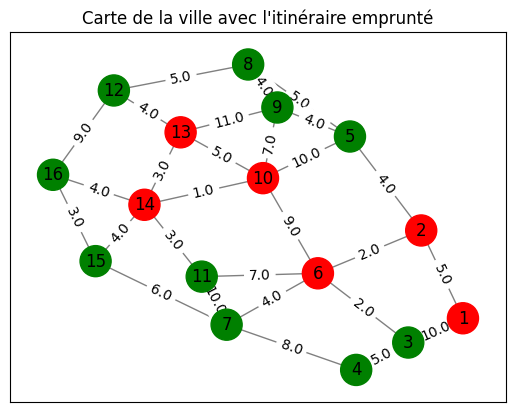

In [37]:
lt.carte_graphe(travaux, it6)